# 0. G.A suites 이해하기

### `src/ga/genetic_algorithm.py` 파일

**원하는 형태의 G.A 조건을 `GAPipeline` 을 통해 설정할 수 있습니다.**

> 하단 주석을 상세히 읽어주세요.
>
> 또한 코드에 모두 주석을 달아두었습니다. 해당 내용을 읽어주세요
>
> Vscode에서 `Ctrl` + click or `Cmd` + click 시 해당 함수 구현부로 자동으로 넘어갑니다. 이용하시길 바랍니다.

```python
criteria_weight_list = (
    1.2,
    0.8,
    1,
)  # Define the criteria with direction, min, and max values

drag_criterion = ("lower", 0.2, 0.5)  # Lower is better, range 0.2 to 0.5
max_temp_criterion = ("lower", 300, 500)  # Lower is better, range 300 to 500
avg_temp_criterion = ("higher", 250, 400)  # Higher is better, range 250 to 400

suite1 = GAPipeline[VentHole](
    suite_name="suite_1",            # <--------- 알고리즘 수행 이름
    suite_max_count=50,              # <--------- 최대 반복 횟수 
    suite_min_population=10,         # <--------- 최소 인구수
    crossover_behavior=OnePointCrossover(), # <--------- Crossover 방법론, 다양한 방법론이 존재하며, 현재 onepoint, twopoint, uniform 방법론을 제작해두었습니다. 더 필요하시면 직접 제작해보시면 됩니다.
    fitness_calculator=VentFitnessCalculator( # <--------- Prediction function을 통해 제작된 값입니다.
        criteria_weight_list=criteria_weight_list, # <----------- fitness의 가중치입니다. w1, w2, w3로 구성되어있으며, 기본은 1, 1, 1입니다. 각각 drag, max_temp, avg_temp로 이루어져 있습니다. 만약 1, 0.8, 1로 설정한다면, max_temp를 덜 고려하겠다라고 이해할 수 있습니다.
        drag_criterion=drag_criterion,
        max_temp_criterion=max_temp_criterion,
        avg_temp_criterion=avg_temp_criterion,
    ),
    immediate_exit_condition=lambda x: x[0] >= 10000 and x[1] >= 10000, # <----------- (fitness, biased_fitness)를 input으로 output으로 True / False를 반환하는 함수입니다. 만약 본 컨디션을 만족한다면, 즉시 종료합니다. (말도 안되는 우수한 개체가 등장)
    mutation_probability=0.001, # <----------- 변이 확률입니다. 0.001이란 0.1%입니다.
    population_initializer=VentInitializer(
        grid_scale=10**20, # <----------- grid 좌표 scale입니다. 저희는 10^20 을 기본 좌표계의 단위로 사용합니다.
        pattern_bound=((-30, 30), (-30, 30)), # <---- grid의 범위입니다. x 축으로 -30 ~ 30, y 축으로 -30 ~ 30의 범위로 그립니다.
        population_size=100, # <---------- 초기 인구수입니다.
        pattern_gene_pool=[circular_params, corn_params, grid_params], # <---------- 그리는 패턴 방식입니다.
        shape_gene_pool=[
            circle_params, # <---------- shape (도형) 형상 틀입니다.
            donut_params, # <---------- shape (도형) 형상 틀입니다.
            wing_params, # <---------- shape (도형) 형상 틀입니다.
            hole_params, # <---------- shape (도형) 형상 틀입니다.
            trapezoid_params, # <---------- shape (도형) 형상 틀입니다.
            triangle_params, # <---------- shape (도형) 형상 틀입니다.
        ],
    ),
    selector_behavior=TournamentSelectionFilter(tournament_size=5), # <---------- 개체 선택, selection 방법입니다. 현재 roulette, tournament, elitism 방식이 존재합니다. 다른 방법론을 원하시면 직접 구현할 수 있습니다.
)
```

## 각각의 suite를 불러옵니다.

In [1]:
from src.ga.genetic_algorithm import suite1, suite2, suite3

[Storage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/store/gene_parameters.json
[Storage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/store/gene_parameters.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/store/pattern_gene_pdf.json
[Storage]: J

# 1. Run Genetic Algorithm

> 매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**
>
> Data 분석 시에 **`run` 함수를 주석처리하여 실행되지 않게 하는것이 중요합니다.**

In [2]:
suite1.run()
# suite2.run()
# suite3.run()

--------------------------------------------------
Suite_name: suite_1
Suite_max_count: 50
Suite_min_population: 10
Immediate_exit: False
Generation: 0
Population_count: 100
Mutation_count: 0
Mutation_probability: 0.001
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: OnePoint Crossover
Population_initializer: VentInitializer
--------------------------------------------------
[StochasticStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/store/suite_1/fitness_evolution.json
[StochasticStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/store/suite_1/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/store/suite_1/population.json
[StochasticStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/store/suite_1/fitness.json
[Storage]: JSON data saved to /Users/june/Documents/project/cau/4

# 2. Plot fitness result for each g.a suites

- biased_fitness: 가중치가 적용된 fitness, w1 * p1 + w2 * p2 + ...
- fitness: 가중치 없이 계산된 fitness, p1 + p2 + ...

/Users/june/Documents/project/cau/4_1/capstone_design_1/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/june/Documents/project/cau/4_1/capstone_design_1/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/june/Documents/project/cau/4_1/capstone_design_1/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/june/Documents/project/cau/4_1/capstone_design_1/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/june/Documents/project

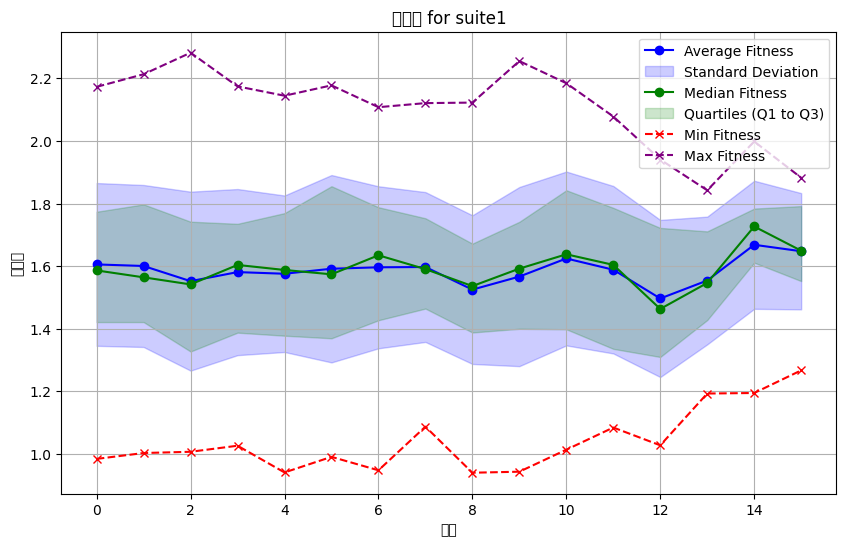

/Users/june/Documents/project/cau/4_1/capstone_design_1/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/june/Documents/project/cau/4_1/capstone_design_1/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


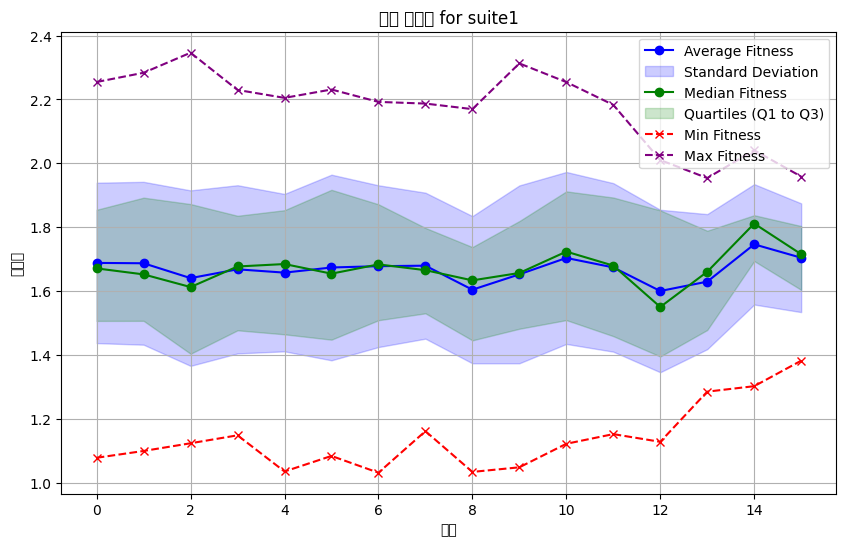

In [3]:
suite1.evolution_storage.plot_fitness(
    storage="fitness", title="적합도 for suite1", xlabel="세대", ylabel="적합도"
)
suite1.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="편향 적합도 for suite1",
    xlabel="세대",
    ylabel="적합도",
)

# 3. Plot shapes for final populations

## import visualizer

In [4]:
from src.grid.visualize_points import visualize_points

## Visualize final patterns

> **시각화 또한 큰 연산입니다. 신중히 실행하시길 바랍니다.**

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.

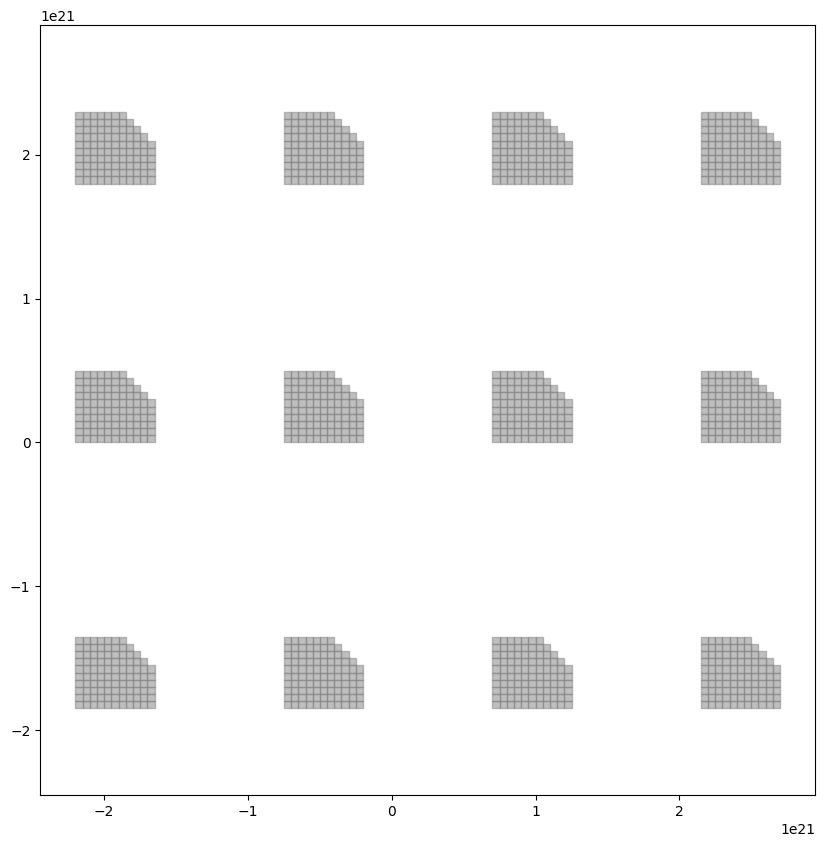

In [5]:
count = suite1.population_count
mod_count = 1  # 예시용

for i in range(mod_count):
    visualize_points(
        suite1.population[i].pattern.pattern_matrix,
        suite1.population[i].pattern.pattern_unit.grid.k,
    )

# 4. Data 분석하기

1. 모든 Data는 각 G.A의 조건에 따라 독립적으로 관리됩니다.
2. `store` 폴더에 각 suite에 결과가 저장됩니다.

<img src="./assets/store.png" width="350" />

### `Store` 에 저장된 데이터

1. {suite_name} 각 G.A 설정에 따른 결과 저장 폴더
2. 편향 적합도 세대 계산 결과: `store/{suite_name}/biased_fitness_evolution.json`
3. 적합도 세대 계산 결과: `store/{suite_name}/fitness_evolution.json`
4. 최종 세대의 적합도 결과: `store/{suite_name}/fitness.json`
5. 최종 세대의 인구(유전자) 결과: `store/{suite_name}/population.json`
6. 각 유전자의 파라미터: `store/gene_parameters.json`
7. 패턴 유전자 파라미터 전체 분포: `store/pattern_gene_pdf.json`
8. 형태 유전자 파라미터 전체 분포: `store/shape_gene_pdf.json`

### Json parsing 및 데이터 분석

1. 각 데이터는 모두 `json` 형식으로 지정되어 있습니다.
2. python의 `json` 모듈을 통해 원하는 방식으로 파싱한 후, 데이터를 가공하여 표현할 수 있습니다.